Code for project 2

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

## MAking comments here

$\mathcal{IRENE'S \quad BLOCKS}$

Plot of the variables: High, Low, Close

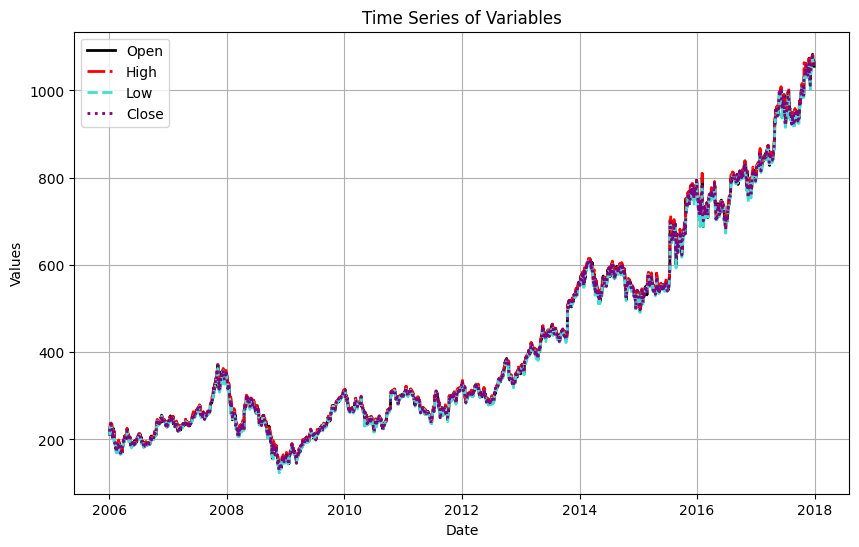

In [3]:
data = pd.read_csv('GOOGL_2006-01-01_to_2018-01-01.csv', parse_dates=['Date'])

data = data.drop("Name", axis=1)
data.set_index('Date', inplace=True)
Open=data['Open']
High=data['High']
Low=data['Low']
Close=data['Close']
Volume=data['Volume']
plt.figure(figsize=(10, 6))
plt.plot(data.index, Open, label='Open', linewidth=2, linestyle='-', color='black' )
plt.plot(data.index, High, label='High', linewidth=2, linestyle='-.', color='red' )
plt.plot(data.index, Low, label='Low', linewidth=2, linestyle='--', color='turquoise' )
plt.plot(data.index, Close, label='Close', linewidth=2,linestyle=':', color='purple' )
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Time Series of Variables')
plt.legend()
plt.grid(True)
plt.show()




Plot mean and SD envelopes to see better

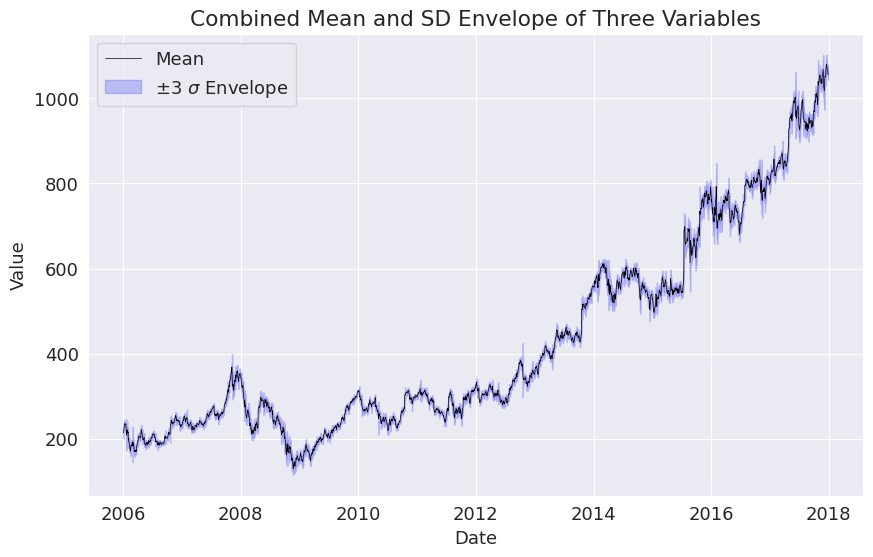

In [17]:
mean_all = data.iloc[:, [0,1, 2, 3]].mean(axis=1)
std_dev_all = data.iloc[:, [0,1, 2, 3]].std(axis=1)
plt.figure(figsize=(10, 6))
plt.plot(data.index, mean_all, label='Mean', color='black', linewidth=0.5)
plt.fill_between(
    data.index,
    mean_all - 3*std_dev_all,  
    mean_all + 3*std_dev_all,  
    color='blue',
    alpha=0.2,  # Adjust transparency
    label='±3 $\sigma$ Envelope'
)

# Labeling the plot
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Combined Mean and SD Envelope of Three Variables')
plt.legend()
plt.show()


Plot of the variable Volume

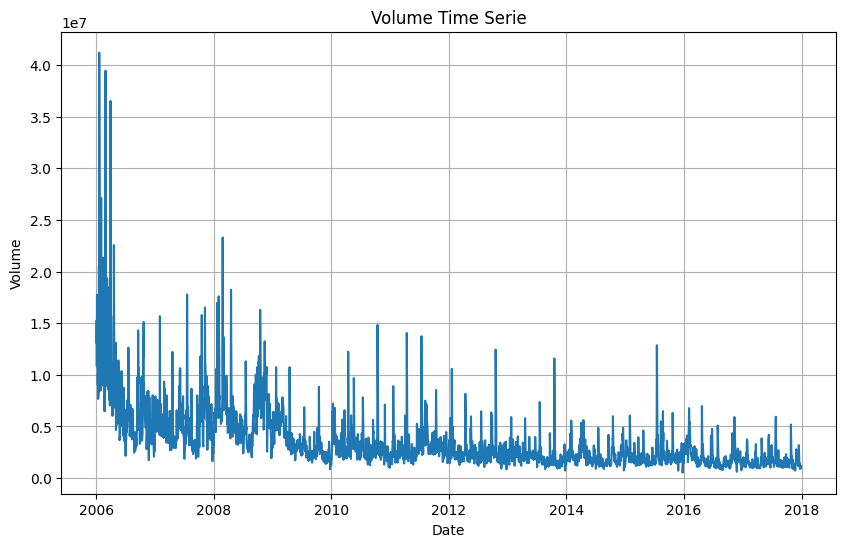

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, Volume, label="Volume")
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Volume Time Serie')
plt.grid(True)
plt.show()

Seasonal Trent decomposition using LOESS (STL)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
sns.set_style("darkgrid")


In [20]:
Open_ts = pd.Series(
    Open, index=pd.date_range("2006-01-03", periods=len(Open), freq="M"), name="Open"
)
Open_ts.describe()

/tmp/ipykernel_14315/3109631639.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  Open, index=pd.date_range("2006-01-03", periods=len(Open), freq="M"), name="Open"


count     102.000000
mean      432.528431
std       240.126381
min       152.250000
25%       250.320000
50%       311.150000
75%       586.635000
max      1039.940000
Name: Open, dtype: float64

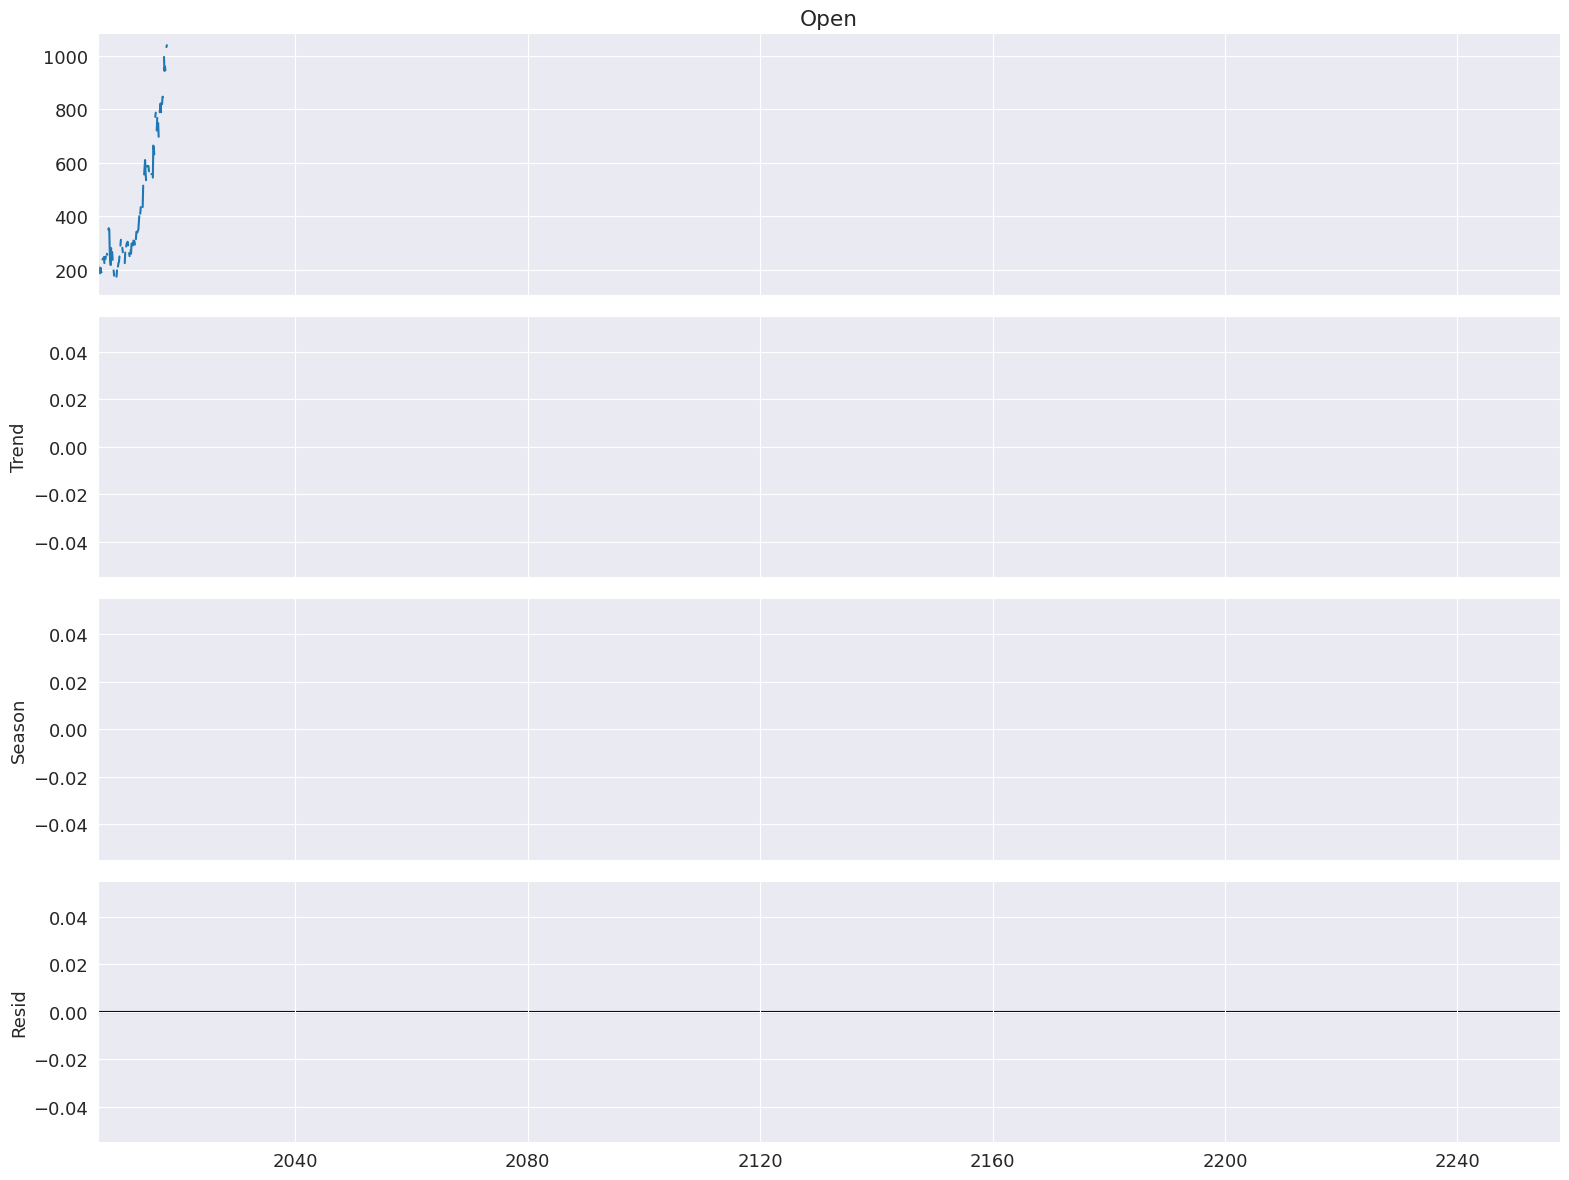

In [ ]:
plt.rc("figure", figsize=(16, 12))
plt.rc("font", size=13)
from statsmodels.tsa.seasonal import STL

stl = STL(Open_ts, seasonal=7, period=) # what to put as seasonal?
res = stl.fit()
fig = res.plot()


Seasonal Trend Decomposition


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose


data["Open"] = data["Open"].fillna(method='ffill')
data["Open"].index = pd.to_datetime(data.index)
data["Open"] = data["Open"].asfreq('B')

# daily seasonality
result = seasonal_decompose(data["Open"], model='multiplicative', period=365)
result.plot()
plt.show()


In [ ]:
data["Close"] = data["Close"].fillna(method='ffill')
data["Close"].index = pd.to_datetime(data.index)
data["Close"] = data["Close"].asfreq('B')

# daily seasonality
result = seasonal_decompose(data["Close"], model='multiplicative', period=365)
result.plot()
plt.show()

In [ ]:
data["High"] = data["High"].fillna(method='ffill')
data["High"].index = pd.to_datetime(data.index)
data["High"] = data["High"].asfreq('B')

# daily seasonality
result = seasonal_decompose(data["High"], model='multiplicative', period=365)
result.plot()
plt.show()

In [ ]:
data["Volume"] = data["Volume"].fillna(method='ffill')
data["Volume"].index = pd.to_datetime(data.index)
data["Volume"] = data["Volume"].asfreq('B')

# daily seasonality
result = seasonal_decompose(data["Volume"], model='multiplicative', period=365)
result.plot()
plt.show()

In [ ]:
data["Low"] = data["Low"].fillna(method='ffill')
data["Low"].index = pd.to_datetime(data.index)
data["Low"] = data["Low"].asfreq('B')

# daily seasonality
result = seasonal_decompose(data["Low"], model='multiplicative', period=365)
result.plot()
plt.show()

Anton's blocks: added alternate visualisation of stock price over time and volume traded per price graph

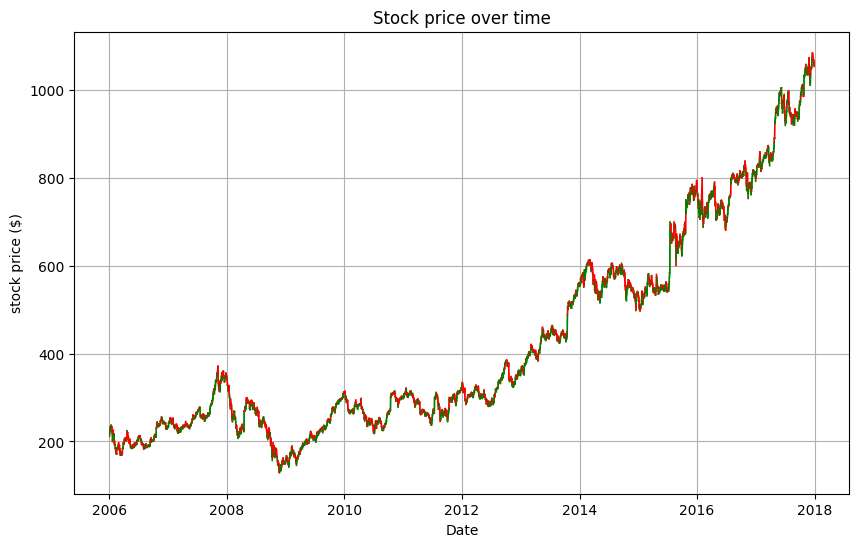

In [3]:
Open = data['Open']
Close=data['Close']

Volume=data['Volume']

plt.figure(figsize=(10, 6))

# Loop through the data and plot in different colors based on the condition
for i in range(1, len(data)):

    date_current = data.index[i-1:i+1]

    # Choose color based on condition
    if Close.iloc[i] > Open.iloc[i]:
        color = 'green'
    else:
        color = 'red'
    
    # Plot the segments with the chosen color
    plt.plot(date_current, [Open.iloc[i-1], Open.iloc[i]], color=color, linestyle='-', linewidth=1)
    plt.plot(date_current, [Close.iloc[i-1], Close.iloc[i]], color=color, linestyle='-', linewidth=1)

plt.xlabel('Date')
plt.ylabel('stock price ($)')
plt.title('Stock price over time')
plt.grid(True)
plt.show()

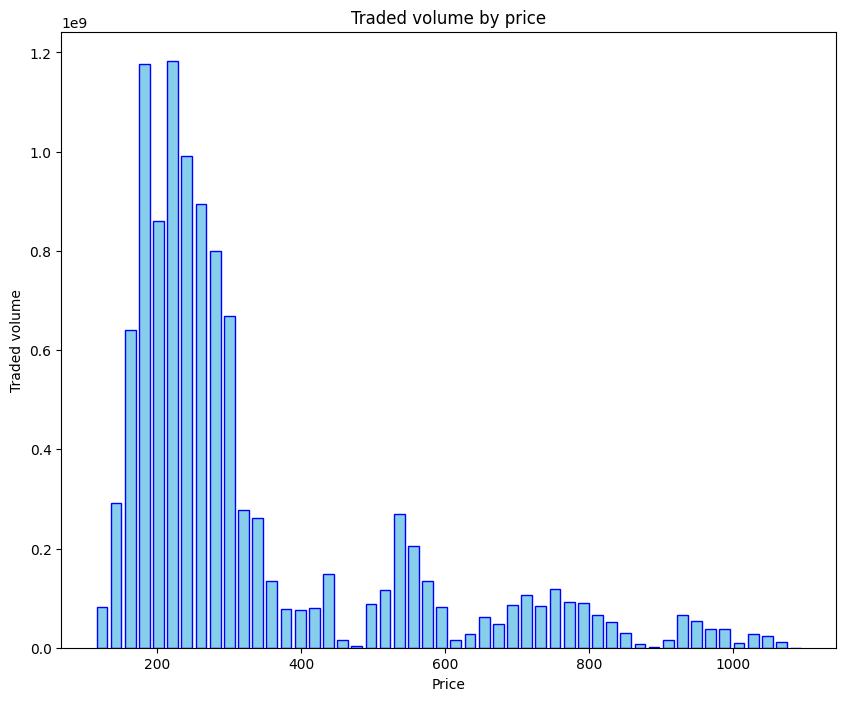

In [4]:
import numpy as np

num_bins = 50 # Number of bins

# Define price bins based on high and low price
price_min = data['Low'].min()
price_max = data['High'].max()
bins = np.linspace(price_min, price_max, num_bins)

# Calculate the midpoints of the bins for plotting

# Calculate the volume in each price bin
volume_by_price = np.zeros(len(bins))

for i in range(len(bins)-1):
    mask = (Close >= bins[i]) & (Close < bins[i + 1])
    volume_by_price[i] = Volume[mask].sum()

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))

# Create a horizontal bar chart for volume by price
ax.bar(bins, volume_by_price, align='center', color='skyblue', edgecolor='blue', width=15)
ax.set_xlabel('Price')
ax.set_ylabel('Traded volume')
ax.set_title('Traded volume by price')

plt.show()

Autocorrelation analysis

            0        1        2        3           4
0      211.47   218.05   209.32   217.83  13137450.0
1      222.17   224.70   220.09   222.84  15292353.0
2      223.22   226.00   220.97   225.85  10815661.0
3      228.66   235.49   226.85   233.06  17759521.0
4      233.44   236.94   230.70   233.68  12795837.0
...       ...      ...      ...      ...         ...
3014  1070.00  1071.72  1067.64  1068.86    889446.0
3015  1068.64  1068.86  1058.64  1065.85    918767.0
3016  1066.60  1068.27  1058.38  1060.20   1116203.0
3017  1062.25  1064.84  1053.38  1055.95    994249.0
3018  1055.49  1058.05  1052.70  1053.40   1180340.0

[3019 rows x 5 columns]
          0         1         2         3         4
0  1.000000  0.999894  0.999841  0.999742 -0.443155
1  0.999894  1.000000  0.999827  0.999866 -0.440717
2  0.999841  0.999827  1.000000  0.999896 -0.447781
3  0.999742  0.999866  0.999896  1.000000 -0.444590
4 -0.443155 -0.440717 -0.447781 -0.444590  1.000000


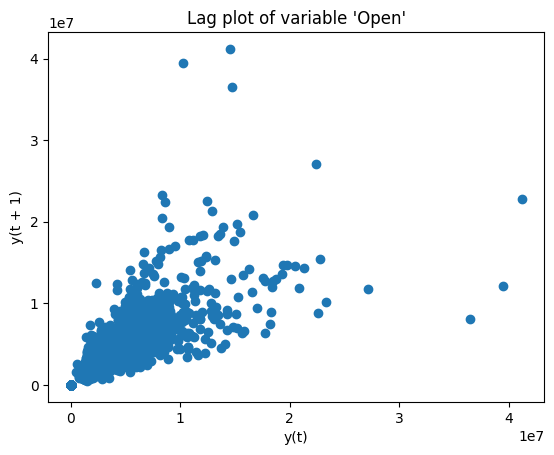

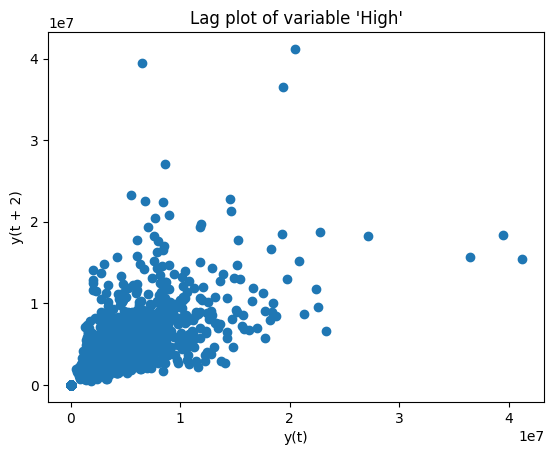

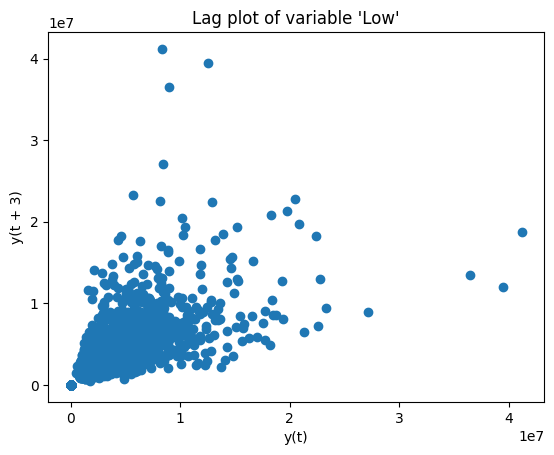

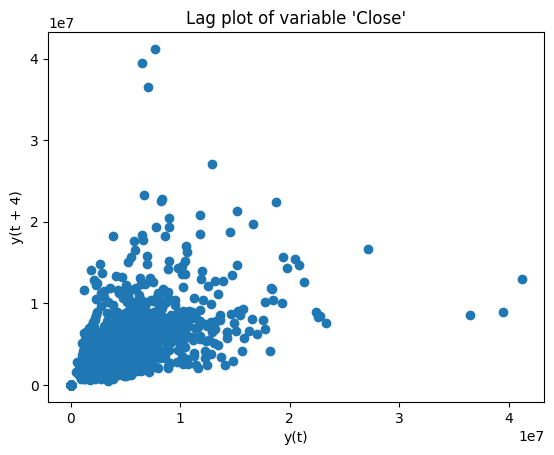

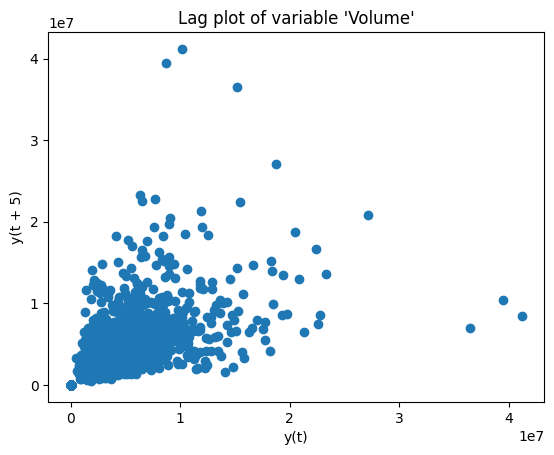

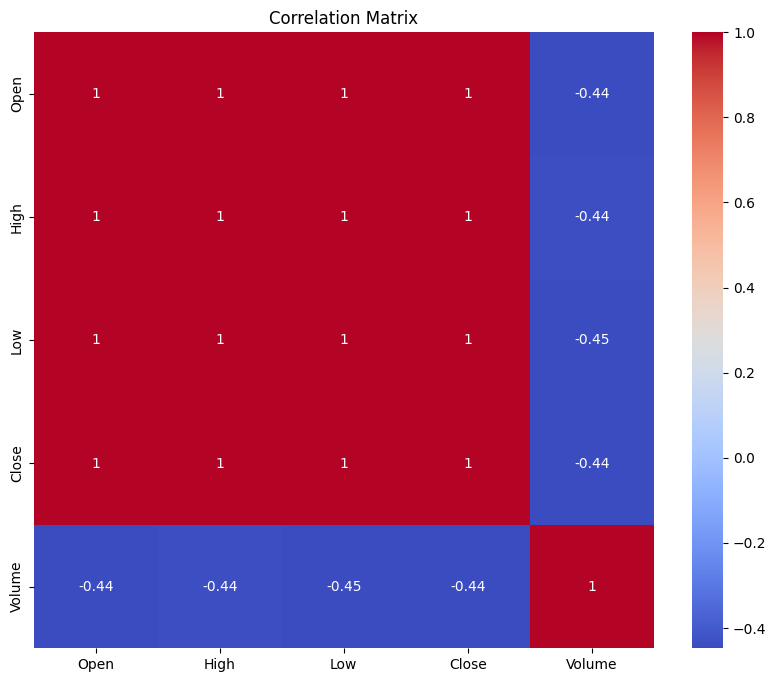

<Figure size 640x480 with 0 Axes>

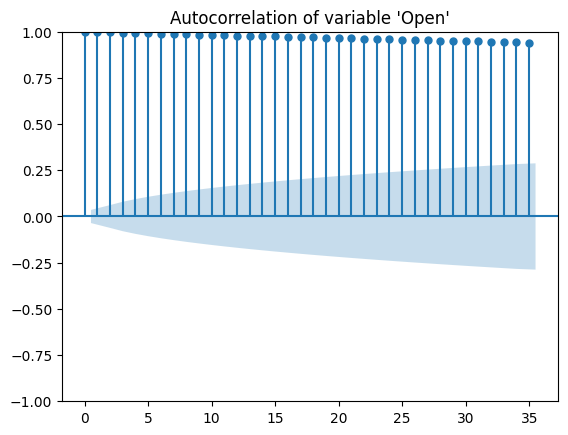

<Figure size 640x480 with 0 Axes>

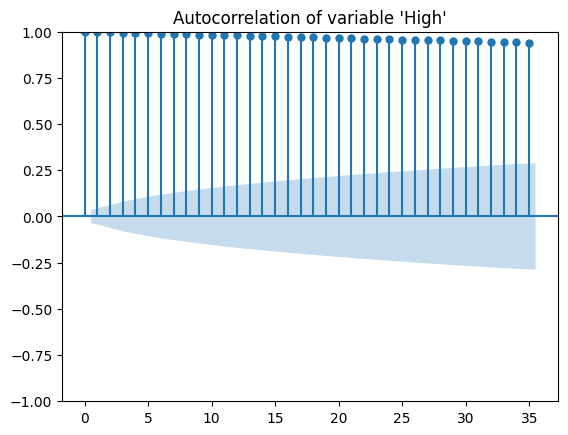

<Figure size 640x480 with 0 Axes>

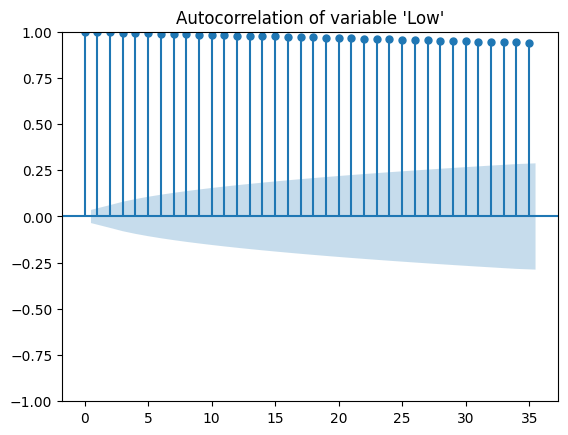

<Figure size 640x480 with 0 Axes>

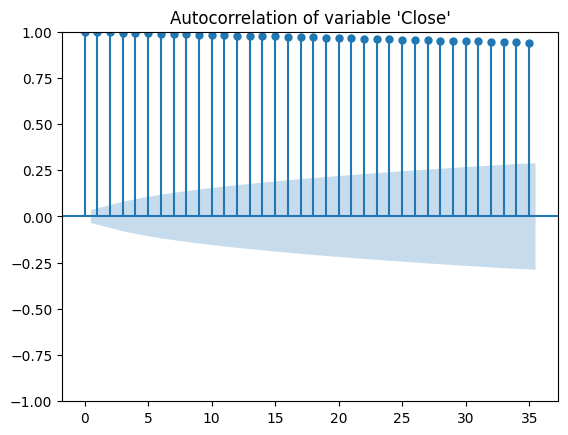

<Figure size 640x480 with 0 Axes>

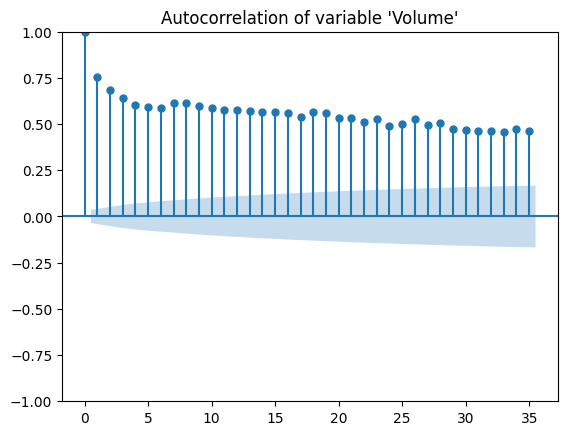

In [15]:
# lagplot
for i in range(5):
    plt.figure()
    pd.plotting.lag_plot(data, lag=i+1)
    plt.title("Lag plot of variable '" + data.columns[i]  + "'")
    plt.savefig("Lag_plot_" + str(i) + ".png")
 
# extracting only the temperature values
values = pd.DataFrame(data.values)
print(values)

# Create correlation matrix
correlation_matrix = values.corr()

# Print the correlation matrix
print(correlation_matrix)

# Optionally, plot the correlation matrix for better visualization
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", xticklabels=data.columns, yticklabels=data.columns)
plt.title("Correlation Matrix")
plt.show()

from statsmodels.graphics.tsaplots import plot_acf

for i in range(5):
    plt.figure()
    plot_acf(data.iloc[:, i])
    plt.title("Autocorrelation of variable '" + data.columns[i]  + "'")
    plt.savefig("auc_" + str(i) + ".png")

